# Resources

- [Blog post](https://medium.com/grabngoinfo/4-clustering-model-algorithms-in-python-and-which-is-the-best-7f3431a6e624) for this tutorial
- Video version of the tutorial on [YouTube](https://www.youtube.com/watch?v=K_KibNSH1_0&list=PLVppujud2yJqzHOAwlk4sL8rmphFYN59J&index=2)
- More video tutorials on [unsupervised model](https://www.youtube.com/playlist?list=PLVppujud2yJoLN1xHi8pBkrA-BPkWvUMr)
- More blog posts on [unsupervised model](https://medium.com/@AmyGrabNGoInfo/list/unsupervised-model-1b518a1f1176)

For more information about data science and machine learning, please check out my [YouTube channel](https://www.youtube.com/channel/UCmbA7XB6Wb7bLwJw9ARPcYg), [Medium Page](https://medium.com/@AmyGrabNGoInfo) and [GrabNGoInfo.com](https://grabngoinfo.com/tutorials/), or follow GrabNGoInfo on [LinkedIn](https://www.linkedin.com/company/grabngoinfo/).

# Intro

Welcome to GrabNGoInfo! In this tutorial, we will talk about four clustering model algorithms, compare their results, and discuss how to choose a clustering algorithm for a project. You will learn:

*   What are the different types of clustering model algorithms?
*   How to run K-means, Gaussian Mixture Model (GMM), Hierarchical model, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise) model in Python?
* How to use PCA (Principal Component Analysis) and t-SNE (t-distributed stochastic neighbor embedding) for dimensionality reduction and visualization?
* How to utilize clustering model results for the business?
* How to select a clustering model algorithm for your project?


Let's get started!

# Step 0: Clustering Model Algorithms

Based on the underlying algorithm for grouping the data, the clustering model can be divided into different types.

The following four types are the most widely used types of clustering models.
*   **Centroid Model** uses the distance between a data point and the centroid of the cluster to group data. K-means clustering is an example of a centroid model.
*   **Distribution Model** segments data based on their probability of belonging to the same distribution. Gaussian Mixed Model (GMM) is a popular distribution model.
*   **Connectivity Model** uses the closeness of the data points to decide the clusters. Hierarchical Clustering Model is a widely used connectivity model.
*   **Density Model** scans the data space and assigns clusters based on the density of data points. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density model.

In this tutorial, we will create clustering models for the same dataset using the four algorithms and compare their results.

# Step 1: Import Libraries

In the first step, we will import the Python libraries.
* `pandas` and `numpy` are for data processing.
* `matplotlib` and `seaborn` are for visualization.
* `datasets` from the `sklearn` library contains some toy datasets. We will use the iris dataset to illustrate different ways of deciding the number of clusters.
* `PCA` and `TSNE` are for dimensionality reduction.
* `KMeans`, `AgglomerativeClustering`, `GaussianMixture`, and `DBSCAN` are for clustering models.

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# Step 2: Read Data

Step 2 reads the data. we first load the data using `load_iris()`, which is in a Python dictionary format. The keys of the dictionary show that the iris dataset includes the data, target, frame, target names, description of the dataset, feature names, filename, and data module.

In [ ]:
# Load data
iris = datasets.load_iris()

# Show data information
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Next, let's print out the `feature_names`, `target_names`, and `target`. We can see that there are four features, sepal length, sepal width, petal length, and petal width. The target contains the names of three different flowers, Setosa, Versicolor, and Virginica, which are encoded into three numbers, 0, 1, and 2.

In [ ]:
# Print feature and target information
print('The feature names are:', iris['feature_names'])
print('The target names are:', iris['target_names'])
print('The target values are:', iris['target'])

The feature names are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The target names are: ['setosa' 'versicolor' 'virginica']
The target values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In order to use the data for the clustering model, we need to convert the data into a dataframe format. Using `.info()`, we can see that the dataset has 150 records, and there are no missing values.

In [ ]:
# Put features data into a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target to the dataframe
df['target'] = iris.target

# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Using `value_counts()`, we can see that there are 50 records for each type of flower.

In [ ]:
# Check counts of each category
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Clustering model is a type of unsupervised model, so we will not use the target information for the model. Only the four features will be utilized in the model and the goal is to group the same type of flowers together. Therefore, a new dataframe called X is created, which includes only the four features.

In [ ]:
# Remove target for the clustering model
X = df[df.columns.difference(['target'])]

# Step 3: Decide the Number of Clusters

After creating the modeling dataset and before running the model, we need to decide the number of clusters.

Deciding the optimal number of clusters is a critical step in building a good unsupervised clustering model. In my previous tutorial, I talked about [5 Ways for Deciding Number of Clusters in a Clustering Model](https://medium.com/grabngoinfo/5-ways-for-deciding-number-of-clusters-in-a-clustering-model-5db993ea5e09). It covered the elbow method, the Silhouette score, the hierarchical graph, AIC, BIC, and gap statistics for deciding the number of clusters.

In this tutorial, we will not repeat the content and will use 3 as the number of clusters directly.

# Step 4: Kmeans Clustering (Model 1)

KMeans clustering algorithm works as follows for a dataset with n data points and k clusters:
1. k data points are randomly selected as the centroids. In the Python `sklearn` implementation, this step corresponds to a hyperparameter called `init`. The default value is `k-means++`, which is an improved version that makes the centroids to be far from one another.
2. Assign all the data points to the closest centroid, and we get k clusters.
3. Calculate the new centroid for each cluster based on the data points in the cluster.
4. Repeat step 2 and step 3 until the centroids do not change anymore.

When using the `sklearn` implementation of KMeans
* Firstly, we need to initiate the model using the method `KMeans`, and specify the number of clusters. The `random_state` is for results reproducibility.
* Secondly, we fit and predict on the modeling data, and save the prediction output in a variable called `y_kmeans`.
* Next, the prediction results are saved in the dataframe as a column.
* Finally, we check the counts for each cluster and see that there are 62, 50, and 38 data points in the three clusters respectively.



In [ ]:
# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 42)

# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)

# Save the predictions as a column
df['y_kmeans']=y_kmeans

# Check the distribution
df['y_kmeans'].value_counts()

0    62
1    50
2    38
Name: y_kmeans, dtype: int64

**KMeans Pros**
* KMeans is fast and scalable

**KMeans Cons**
* The model performance is highly impacted by the initial centroids. Some centroids initiation can produce sub-optimal results.
* KMeans model does not perform well when the cluster sizes vary a lot, have different densities, or have a non-spherical shape [1].

# Step 5: Hierarchical Clustering (Model 2)

`AgglomerativeClustering` is a type of hierarchical clustering algorithm.
* It uses a bottom-up approach and starts each data point as an individual cluster.
* Then the clusters that are closest to each other are connected until all the clusters are connected into one.
* The hierarchical clustering algorithms produce a binary tree, where the root of the tree includes all the data points, and the leaves of the tree are the individual data points.

The Python code implementation of the hierarchical clustering model is similar to the KMeans clustering model, we just need to change the method from `KMeans` to `AgglomerativeClustering`.

In [ ]:
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 3)

# Fit and predict on the data
y_hc = hc.fit_predict(X)

# Save the predictions as a column
df['y_hc']=y_hc

# Check the distribution
df['y_hc'].value_counts()

0    64
1    50
2    36
Name: y_hc, dtype: int64

**Hierarchical Model Pros**
* Hierarchical model works well for large datasets or a large number of clusters [1].
* It's flexible about the shape of the data.
* It can use any pairwise distance, such as `euclidean`, `manhatton`, and `cosine` distance [3].

**Hierarchical Model Cons**
* AgglomerativeClustering needs to use a connectivity matrix in order to scale to a large dataset. The connectivity matrix is computationally expensive when no connectivity constraints because it considers all the possible combinations of merges [4].

# Step 6: Gaussian Mixture Model (GMM) (Model 3)

Gaussian Mixture Model (GMM) is a probabilistic model that assumes each data point belongs to a Gaussian distribution. It uses the expectation-maximization (EM) algorithm.
* In the expectation step, the algorithm estimates the probability of each data point belonging to each cluster.
* In the maximization step, each cluster is updated using the estimated probability of belonging to the cluster of all the data points.
* The updates of the cluster are mostly impacted by the data points with high probabilities of belonging to the cluster.

The Python code implementation of Gaussian Mixture Model (GMM) is similar to the KMeans clustering model, we just need to change the method from `KMeans` to `GaussianMixture`.

One difference is that we changed the value for `n_init` from the default value of 1 to 5. `n_init` is the number of initialization to generate. When setting it to 5, it means that 5 initializations for the model will be performed, and the one with the best result is kept.

In [ ]:
# Fit the GMM model
gmm = GaussianMixture(n_components=3, n_init=5, random_state=42)

# Fit and predict on the data
y_gmm = gmm.fit_predict(X)

# Save the prediction as a column
df['y_gmm']=y_gmm

# Check the distribution
df['y_gmm'].value_counts()

2    55
1    50
0    45
Name: y_gmm, dtype: int64

**Gaussian Mixture Model (GMM) Pros**
* It's a generative model, so we can generate new data for the clusters based on the distributions.
* It's a probabilistic model, and works very well on ellipsoidal-shaped data [1].

**Gaussian Mixture Model (GMM) Cons**
* May converge to a suboptimal solution because of the initial values, so we need to set `n_init` to run the model multiple times and pick the best initial values [1].
* It does not work well on the dataset that is not ellipsoidal shape.

# Step 7: Density-based spatial clustering of applications with noise (DBSCAN) (Model 4)

DBSCAN defines clusters using data density. It has two important hyperparameters to tune, `eps` and `min_samples`.
* `eps` is the epsilon distance to be considered as the neighborhood of a data point. It is the most important parameter for DBSCAN [6].
* `min_samples` is the number of minimum data points in the neighborhood in order for a data point to be considered as a core data point. This number includes the data point itself [6].
* All data points in the neighborhood of the core data points belong to the same cluster.
* The data points that are not core data points and do not have a core data point in the neighborhood are considered outliers. The label -1 in the prediction results represents outliers. To learn more about anomaly detection, please check out my previous tutorials on [One-Class SVM For Anomaly Detection](https://medium.com/grabngoinfo/one-class-svm-for-anomaly-detection-6c97fdd6d8af), [Isolation Forest For Anomaly Detection](https://medium.com/grabngoinfo/isolation-forest-for-anomaly-detection-cd7871ae99b4), and [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/grabngoinfo/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4).

DBSCAN does not take a pre-defined number of clusters, and it identifies the number of clusters based on the density distribution of the dataset. We can see that DBSCAN was able to identify two clusters, but was not able to separate the two types of flowers that are similar to each other because they are not well separated.

In [ ]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5)

# Fit and predict on the data
y_dbscan = dbscan.fit_predict(X)

# Save the prediction as a column
df['y_dbscan'] = y_dbscan

# Check the distribution
df['y_dbscan'].value_counts()

 1    98
 0    50
-1     2
Name: y_dbscan, dtype: int64

**DBSCAN Pros**
* It works on datasets of any shape.
* It identifies anomalies automatically.

**DBSCAN Cons**
* It does not work well for identifying the clusters that are not well separated.
* Different clusters in the dataset need to have similar densities, otherwise, the DBSCAN does not perform well.

# Step 8: Dimensionality Reduction

In step 8, we will use two popular algorithms, PCA (Principal Component Analysis) and t-SNE (t-distributed stochastic neighbor embedding) to reduce the dimensionality of the dataset for visualization. There are four features in the dataset. We need to convert the features from a 4-dimensional space to a 2-dimensional space.  The output from PCA and t-SNE are saved in the dataframe as columns.



In [ ]:
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(X)

# Create columns for the 2 PCA components
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# TSNE with 2 components
tsne=TSNE(n_components=2).fit_transform(X)

# Create columns for the 2 TSNE components
df['TSNE1'] = tsne[:, 0]
df['TSNE2'] = tsne[:, 1]

# Take a look at the data
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_kmeans,y_hc,y_gmm,y_dbscan,PCA1,PCA2,TSNE1,TSNE2
0,5.1,3.5,1.4,0.2,0,1,1,1,0,-2.684126,0.319397,16.461742,18.158958
1,4.9,3.0,1.4,0.2,0,1,1,1,0,-2.714142,-0.177001,18.990402,18.990486
2,4.7,3.2,1.3,0.2,0,1,1,1,0,-2.888991,-0.144949,18.998241,17.840977
3,4.6,3.1,1.5,0.2,0,1,1,1,0,-2.745343,-0.318299,19.373632,18.091394
4,5.0,3.6,1.4,0.2,0,1,1,1,0,-2.728717,0.326755,16.399961,17.784451


# Step 9: Visual Comparison of Models

After dimensionality reduction, in step 9, we will visualize the clustering results of each model, and compare them with the ground truth. Note that in the real-world project, the ground truth is not available for clustering models most of the time. The comparison is for illustrating the differences in algorithms only.

Before visualization, we need to align the labels of the model outputs. Since the labels are randomly generated, they do not represent the same flower type in different models, so we need to rename the labels so the same label across different models represents the same flowers.

In [ ]:
# Check label mapping
df.groupby(['target', 'y_kmeans']).size().reset_index(name='counts')

,target,y_kmeans,counts
0,0,1,50
1,1,0,48
2,1,2,2
3,2,0,14
4,2,2,36


For example, we can see that the kmeans predicted label 1 corresponds to the true label 0, the kmeans predicted label 0 corresponds to the true label 1, and the kmeans predicted label 2 corresponds to the true label 2. So the labels are renamed to be consistent with the true label.

This process is implemented to the outputs of hierarchical model, GMM, and DBSCAN as well.

In [ ]:
# Rename labels
df['y_kmeans'] = df['y_kmeans'].map({1: 0, 0: 1, 2: 2})

In [ ]:
# Check label mapping
df.groupby(['target', 'y_hc']).size().reset_index(name='counts')

,target,y_hc,counts
0,0,1,50
1,1,0,49
2,1,2,1
3,2,0,15
4,2,2,35


In [ ]:
# Rename labels
df['y_hc'] = df['y_hc'].map({1: 0, 0: 1, 2: 2})

In [ ]:
# Check label mapping
df.groupby(['target', 'y_gmm']).size().reset_index(name='counts')

,target,y_gmm,counts
0,0,1,50
1,1,0,45
2,1,2,5
3,2,2,50


In [ ]:
# Rename labels
df['y_gmm'] = df['y_gmm'].map({1: 0, 0: 1, 2: 2})

In [ ]:
# Check label mapping
df.groupby(['target', 'y_dbscan']).size().reset_index(name='counts')

,target,y_dbscan,counts
0,0,0,50
1,1,1,50
2,2,-1,2
3,2,1,48


In [ ]:
# Rename labels
df['y_dbscan'] = df['y_dbscan'].map({0: 0, -1: 2, 1: 1})

After relabeling the model predictions, let's visualize the data using PCA first.

In the visualization, there are five charts. The first chart is the ground truth, the second chart is the KMeans prediction, the third chart is the hierarchical model prediction, the fourth chart is the GMM prediction, and the fifth chart is the DBSCAN prediction.

We can see that most of the models are able to accurately predict label 0, because it is well separated from other data points, but GMM did the best job separating label 1 and label 2.

DBSCAN identified two clusters and two data points as outliers.

[Text(0.5, 1.0, 'DBSCAN')]

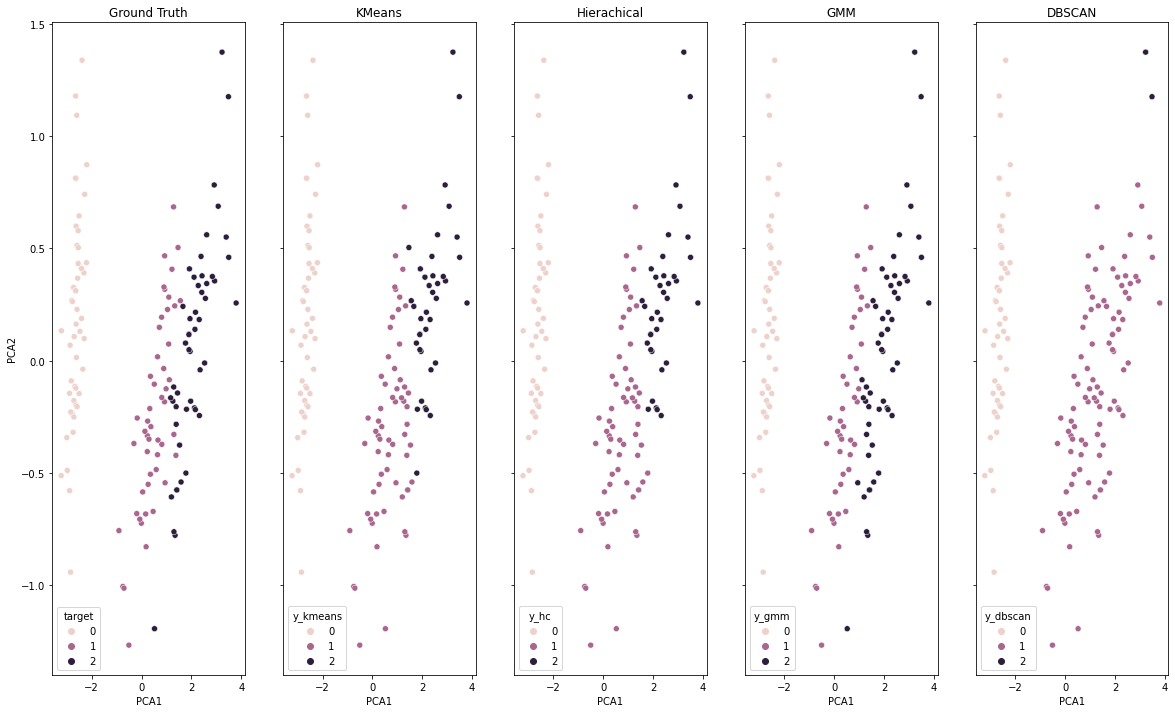

In [ ]:
# Visualization using PCA
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='target', ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_kmeans', ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_hc', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_gmm', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_dbscan', ax=axs[4]).set(title='DBSCAN')

t-SNE shows similar results with more condensed cluster visualization.

[Text(0.5, 1.0, 'DBSCAN')]

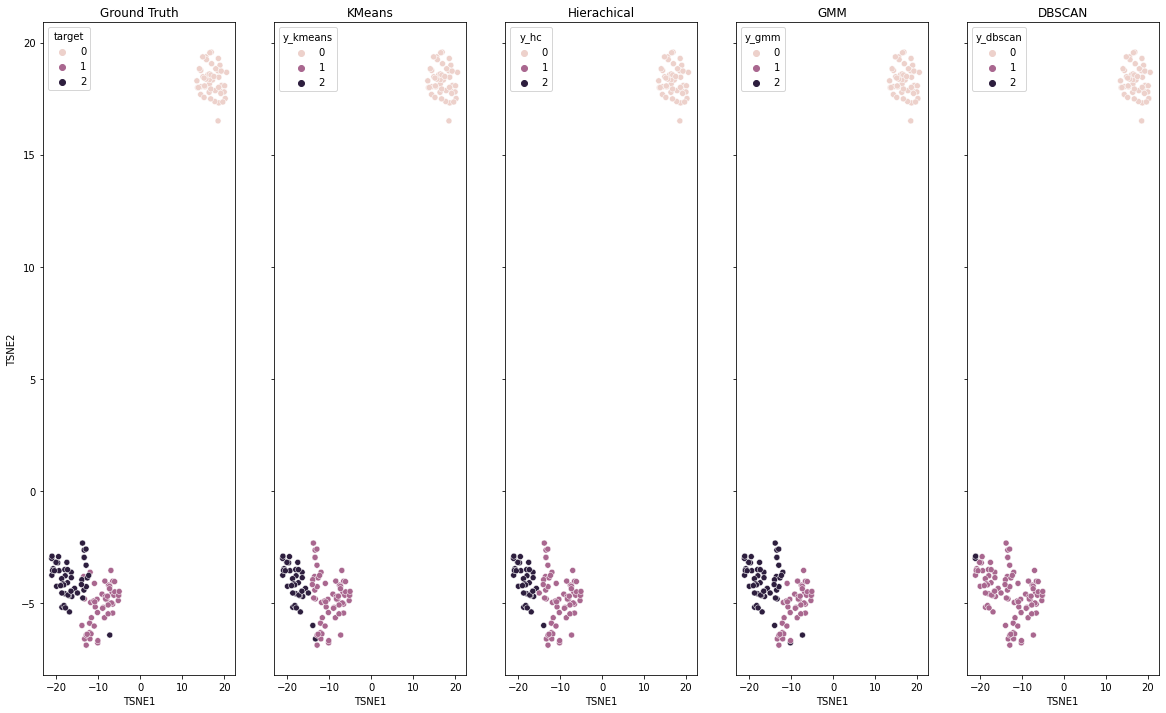

In [ ]:
# Visualization using t-SNE
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='target', ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_kmeans', ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_hc', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_gmm', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_dbscan', ax=axs[4]).set(title='DBSCAN')

# Step 10: Utilize Clustering Model Results for Business

In step 10, we will talk about how to utilize the clustering model predictions in a business environment.

One of the most common use cases for clustering models is customer segmentation. In this example, we will talk about customer segmentation using the clustering model results.

Let's imagine each flower is a customer and the four features are customer age, number of children in a household, tenure with the brand, and distance to the nearest store. We can take the three steps below to do customer segmentation:

* The first step is to do customer profiling for each cluster.
* The second step is to understand the persona of each cluster based on the profiling results.
* The third step is to create personalized strategies for different customer segments.



From the visualization, we can see that two out of the four features are the features that differentiate the three clusters, so we can create personas around the two features and create personalized marketing strategies.

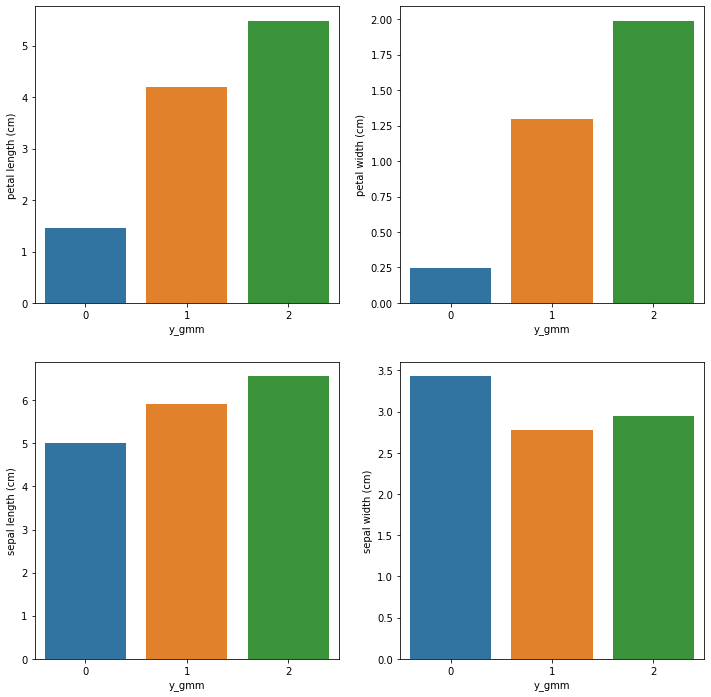

In [ ]:
# Feature list
varList = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
# Calculate average values by predicted cluster
avg = pd.DataFrame(df.groupby(['y_gmm'])[varList].mean().reset_index())

# Visualizae the average values by cluster for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,12))
sns.barplot(x='y_gmm', y=varList[0], data=avg, ax=axs[0,0])
sns.barplot(x='y_gmm', y=varList[1], data=avg, ax=axs[0,1])
sns.barplot(x='y_gmm', y=varList[2], data=avg, ax=axs[1,0])
sns.barplot(x='y_gmm', y=varList[3], data=avg, ax=axs[1,1])

# Step 11: Which Model to Use?

Now we have learned how to build different clustering models, you may wonder which model to use for your specific project. I created a diagram to illustrate how to choose clustering model algorithms based on cluster shapes and densities. Please cite this tutorial when using the diagram.

* If the clusters in the dataset are in ellipsoidal shape and with different densities, we can use GMM or hierarchical model.
* Any of the four clustering model algorithms work well with the dataset with ellipsoidal shape clusters and similar density.
* For the non-ellipsoidal-shaped clusters, we can only choose from DBSCAN and hierarchical model, and DBSCAN model does not work well for the clusters with different densities.
* Hierarchical clustering model is the most flexible, and it can be used for datasets with any shape and density.
* In addition to data shape and density, if there is a need to generate new data points for clusters, we need to use GMM because GMM is a generative model.


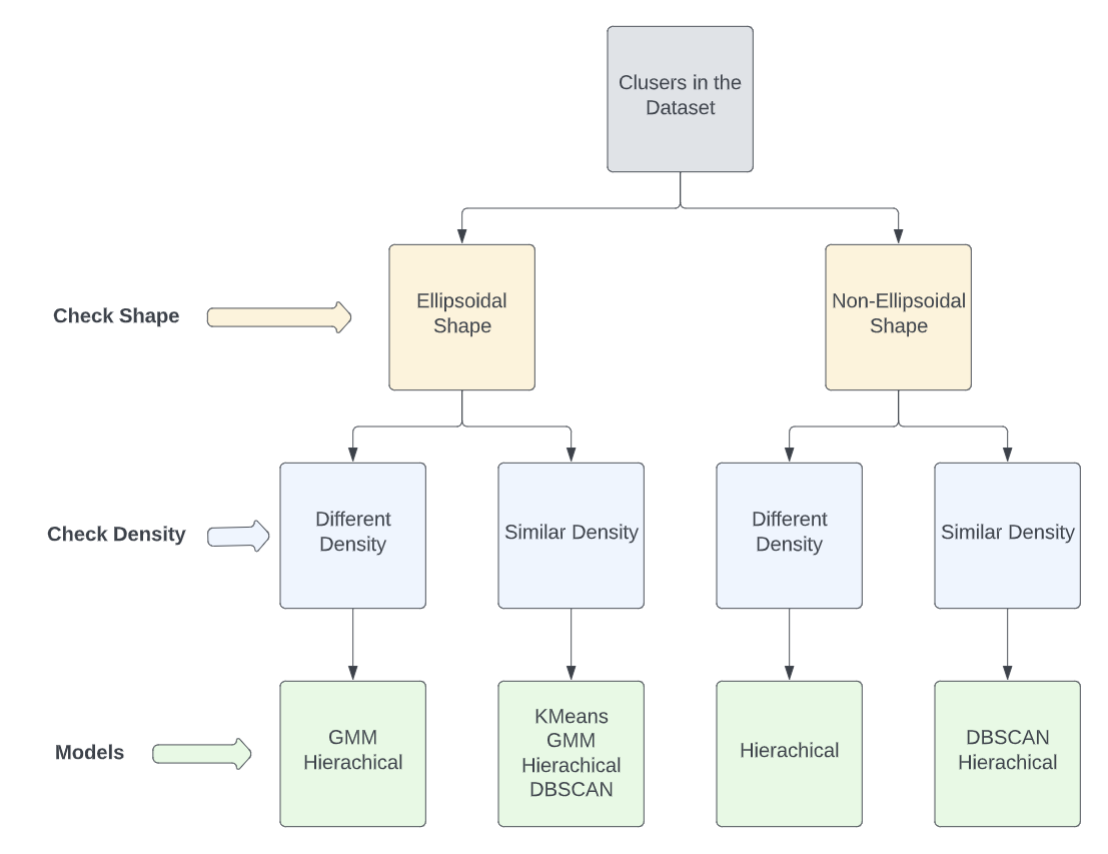

# Put All Code Together

In [ ]:
#---------------------------------------------
# Step 1: Import Libraries
#---------------------------------------------

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

#---------------------------------------------
# Step 2: Read Data
#---------------------------------------------

# Load data
iris = datasets.load_iris()

# Show data information
iris.keys()

# Print feature and target information
print('The feature names are:', iris['feature_names'])
print('The target names are:', iris['target_names'])
print('The target values are:', iris['target'])

# Put features data into a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target to the dataframe
df['target'] = iris.target

# Data information
df.info()

# Check counts of each category
df['target'].value_counts()

# Remove target for the clustering model
X = df[df.columns.difference(['target'])]

#---------------------------------------------
# Step 3: Decide the Number of Clusters
#---------------------------------------------

# please check out https://medium.com/grabngoinfo/5-ways-for-deciding-number-of-clusters-in-a-clustering-model-5db993ea5e09

#---------------------------------------------
# Step 4: Kmeans Clustering (Model 1)
#---------------------------------------------

# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 42)

# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)

# Save the predictions as a column
df['y_kmeans']=y_kmeans

# Check the distribution
df['y_kmeans'].value_counts()

#---------------------------------------------
# Step 5: Hierarchical Clustering (Model 2)
#---------------------------------------------

# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 3)

# Fit and predict on the data
y_hc = hc.fit_predict(X)

# Save the predictions as a column
df['y_hc']=y_hc

# Check the distribution
df['y_hc'].value_counts()

#---------------------------------------------
# Step 6: Gaussian Mixture Model (GMM) (Model 3)
#---------------------------------------------

# Fit the GMM model
gmm = GaussianMixture(n_components=3, n_init=5, random_state=42)

# Fit and predict on the data
y_gmm = gmm.fit_predict(X)

# Save the prediction as a column
df['y_gmm']=y_gmm

# Check the distribution
df['y_gmm'].value_counts()

#---------------------------------------------
# Step 7: Density-based spatial clustering of applications with noise (DBSCAN) (Model 4)
#---------------------------------------------

# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5)

# Fit and predict on the data
y_dbscan = dbscan.fit_predict(X)

# Save the prediction as a column
df['y_dbscan'] = y_dbscan

# Check the distribution
df['y_dbscan'].value_counts()

#---------------------------------------------
# Step 8: Dimensionality Reduction
#---------------------------------------------

# PCA with 2 components
pca=PCA(n_components=2).fit_transform(X)

# Create columns for the 2 PCA components
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# TSNE with 2 components
tsne=TSNE(n_components=2).fit_transform(X)

# Create columns for the 2 TSNE components
df['TSNE1'] = tsne[:, 0]
df['TSNE2'] = tsne[:, 1]

# Take a look at the data
df.head()

#---------------------------------------------
# Step 9: Visual Comparison of Models
#---------------------------------------------

# Check label mapping
df.groupby(['target', 'y_kmeans']).size().reset_index(name='counts')

# Rename labels
df['y_kmeans'] = df['y_kmeans'].map({1: 0, 0: 1, 2: 2})

# Check label mapping
df.groupby(['target', 'y_hc']).size().reset_index(name='counts')

# Rename labels
df['y_hc'] = df['y_hc'].map({1: 0, 0: 1, 2: 2})

# Check label mapping
df.groupby(['target', 'y_gmm']).size().reset_index(name='counts')

# Rename labels
df['y_gmm'] = df['y_gmm'].map({1: 0, 0: 1, 2: 2})

# Check label mapping
df.groupby(['target', 'y_dbscan']).size().reset_index(name='counts')

# Rename labels
df['y_dbscan'] = df['y_dbscan'].map({0: 0, -1: 2, 1: 1})

# Visualization using PCA
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='target', ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_kmeans', ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_hc', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_gmm', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_dbscan', ax=axs[4]).set(title='DBSCAN')

# Visualization using t-SNE
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='target', ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_kmeans', ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_hc', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_gmm', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_dbscan', ax=axs[4]).set(title='DBSCAN')

#---------------------------------------------
# Step 10: Utilize Clustering Model Results for Business
#---------------------------------------------

# Feature list
varList = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
# Calculate average values by predicted cluster
avg = pd.DataFrame(df.groupby(['y_gmm'])[varList].mean().reset_index())

# Visualizae the average values by cluster for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,12))
sns.barplot(x='y_gmm', y=varList[0], data=avg, ax=axs[0,0])
sns.barplot(x='y_gmm', y=varList[1], data=avg, ax=axs[0,1])
sns.barplot(x='y_gmm', y=varList[2], data=avg, ax=axs[1,0])
sns.barplot(x='y_gmm', y=varList[3], data=avg, ax=axs[1,1])

# Summary

In this tutorial, we discussed four clustering model algorithms, compared their results, and talked about how to choose a clustering algorithm for a project. You learned:

*   What are the different types of clustering model algorithms?
*   How to run K-means, Gaussian Mixture Model (GMM), Hierarchical model, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise) model in Python?
* How to use PCA (Principal Component Analysis) and t-SNE (t-distributed stochastic neighbor embedding) for dimensionality reduction and visualization?
* How to utilize clustering model results for businesses?
* How to select a clustering model algorithm for your project?

For more information about data science and machine learning, please check out my [YouTube channel](https://www.youtube.com/channel/UCmbA7XB6Wb7bLwJw9ARPcYg) and [Medium Page](https://medium.com/@AmyGrabNGoInfo).

# Recommended Tutorials

- [GrabNGoInfo Machine Learning Tutorials Inventory](https://medium.com/grabngoinfo/grabngoinfo-machine-learning-tutorials-inventory-9b9d78ebdd67)
- [Hierarchical Topic Model for Airbnb Reviews](https://medium.com/p/hierarchical-topic-model-for-airbnb-reviews-f772eaa30434)
- [3 Ways for Multiple Time Series Forecasting Using Prophet in Python](https://medium.com/p/3-ways-for-multiple-time-series-forecasting-using-prophet-in-python-7a0709a117f9)
- [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/grabngoinfo/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4)
- [Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/time-series-causal-impact-analysis-in-python-63eacb1df5cc)
- [Hyperparameter Tuning For XGBoost](https://medium.com/p/hyperparameter-tuning-for-xgboost-91449869c57e)
- [Four Oversampling And Under-Sampling Methods For Imbalanced Classification Using Python](https://medium.com/p/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037)
- [Five Ways To Create Tables In Databricks](https://medium.com/grabngoinfo/five-ways-to-create-tables-in-databricks-cd3847cfc3aa)
- [Explainable S-Learner Uplift Model Using Python Package CausalML](https://medium.com/grabngoinfo/explainable-s-learner-uplift-model-using-python-package-causalml-a3c2bed3497c)
- [One-Class SVM For Anomaly Detection](https://medium.com/p/one-class-svm-for-anomaly-detection-6c97fdd6d8af)
- [Recommendation System: Item-Based Collaborative Filtering](https://medium.com/grabngoinfo/recommendation-system-item-based-collaborative-filtering-f5078504996a)
- [Hyperparameter Tuning for Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-for-time-series-causal-impact-analysis-in-python-c8f7246c4d22)
- [Hyperparameter Tuning and Regularization for Time Series Model Using Prophet in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-and-regularization-for-time-series-model-using-prophet-in-python-9791370a07dc)
- [Multivariate Time Series Forecasting with Seasonality and Holiday Effect Using Prophet in Python](https://medium.com/p/multivariate-time-series-forecasting-with-seasonality-and-holiday-effect-using-prophet-in-python-d5d4150eeb57)
- [LASSO (L1) Vs Ridge (L2) Vs Elastic Net Regularization For Classification Model](https://medium.com/towards-artificial-intelligence/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9)
- [S Learner Uplift Model for Individual Treatment Effect and Customer Segmentation in Python](https://medium.com/grabngoinfo/s-learner-uplift-model-for-individual-treatment-effect-and-customer-segmentation-in-python-9d410746e122)
- [How to Use R with Google Colab Notebook](https://medium.com/p/how-to-use-r-with-google-colab-notebook-610c3a2f0eab)

# References

[1] [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 2nd Edition](https://amzn.to/3MfsS2U)

[2] [sklearn documentation on KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[3] [sklearn documentation on AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

[4] [sklearn user guide on hierachical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

[5] [sklearn user guide on Gaussian Mixture Model](https://scikit-learn.org/stable/modules/mixture.html#gmm)

[6] [sklearn documentation on DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)